# Problems encountered while containerization, naming errors and to resolve this it needs a fresh build command to create the containers again with renewd names from local to docker file repo:

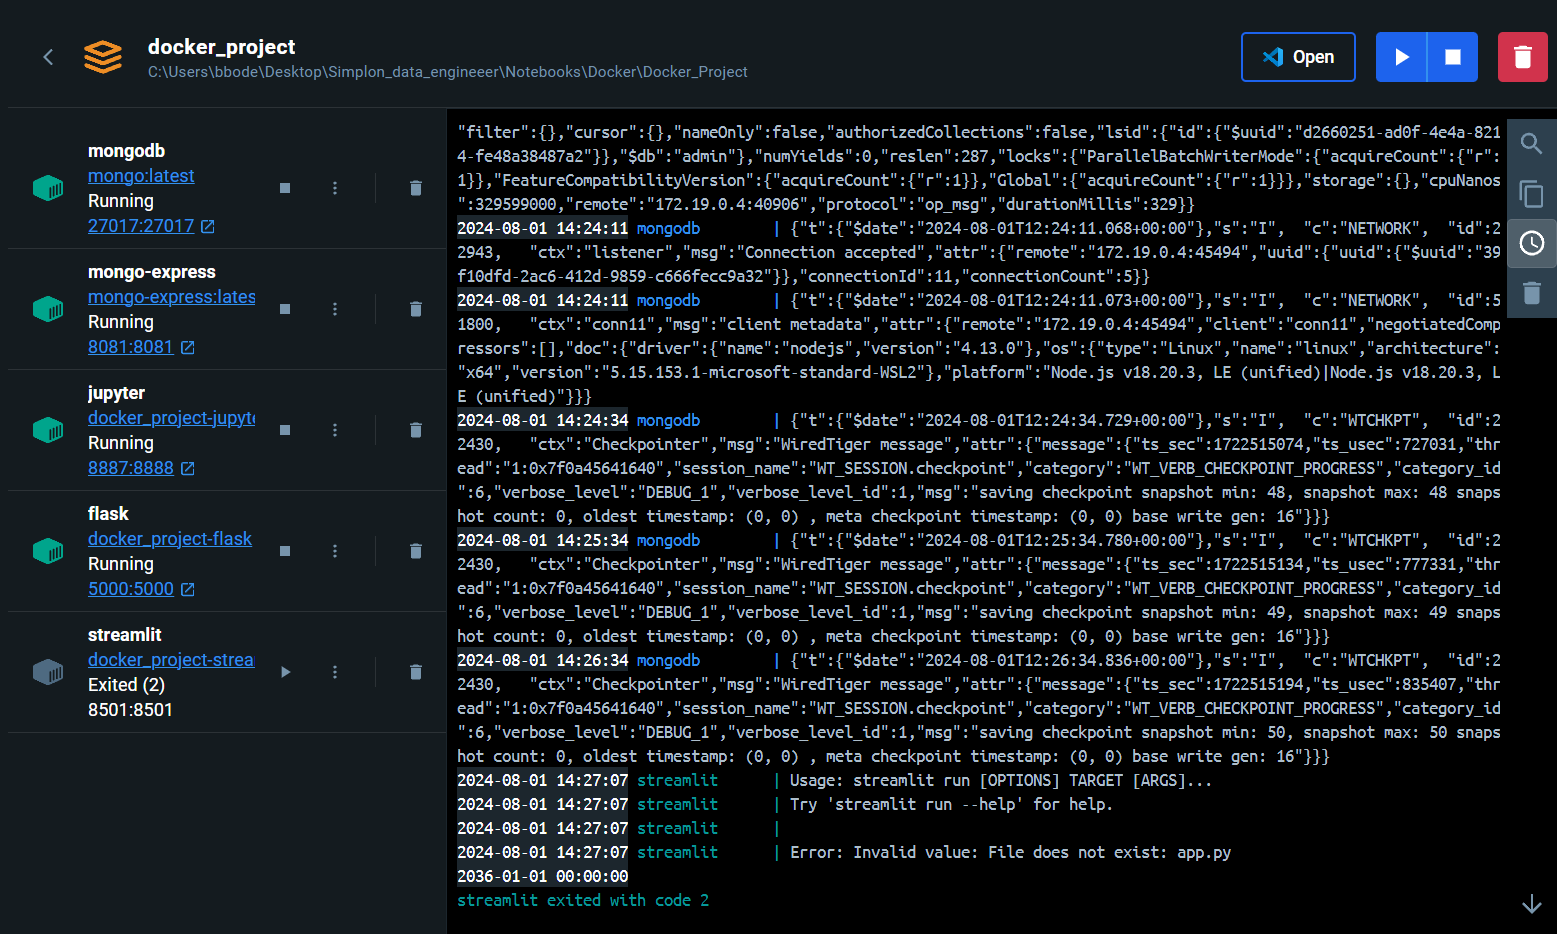

# It works after a fresh build (docker-compose up --build)

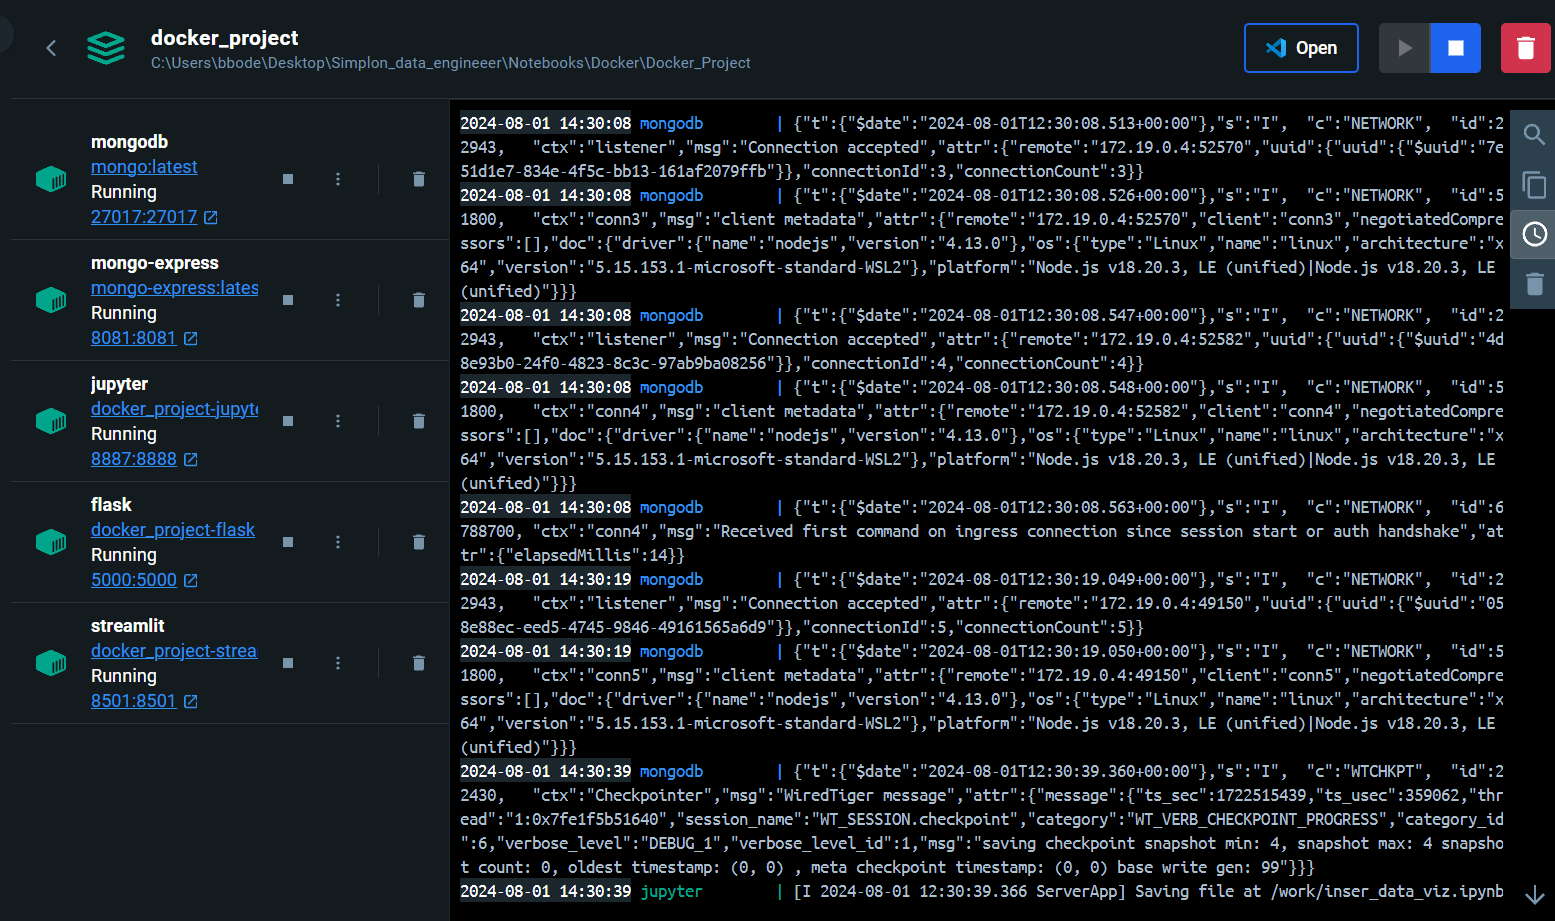

# MongoDB using a web browser or an HTTP client on the default MongoDB port (27017) is not valid because MongoDB's native driver port is for database connections, not HTTP connections. To manage MongoDB via a web interface, we should use Mongo Express, which is designed for this purpose.

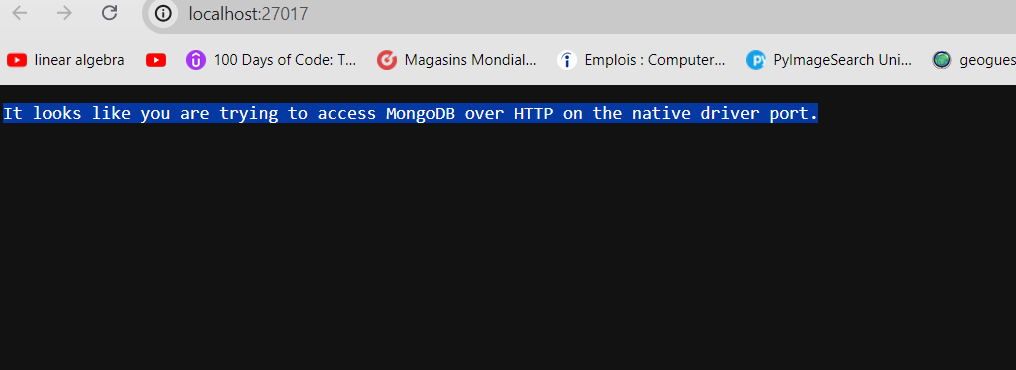

# Analysis of active services and the priority in which they are accessed

## Launch MongoDB: MongoDB container starts first, setting up the database service, use express as interface for data.
## Launch Flask: Flask container starts after MongoDB, using the REST API to interact with MongoDB.
## Launch Streamlit: Streamlit container starts after MongoDB, visualizing data fetched from MongoDB.
## Launch Jupyter: Jupyter container starts after MongoDB, providing an interactive environment for data analysis.

## Display of vizulaization on streamlit

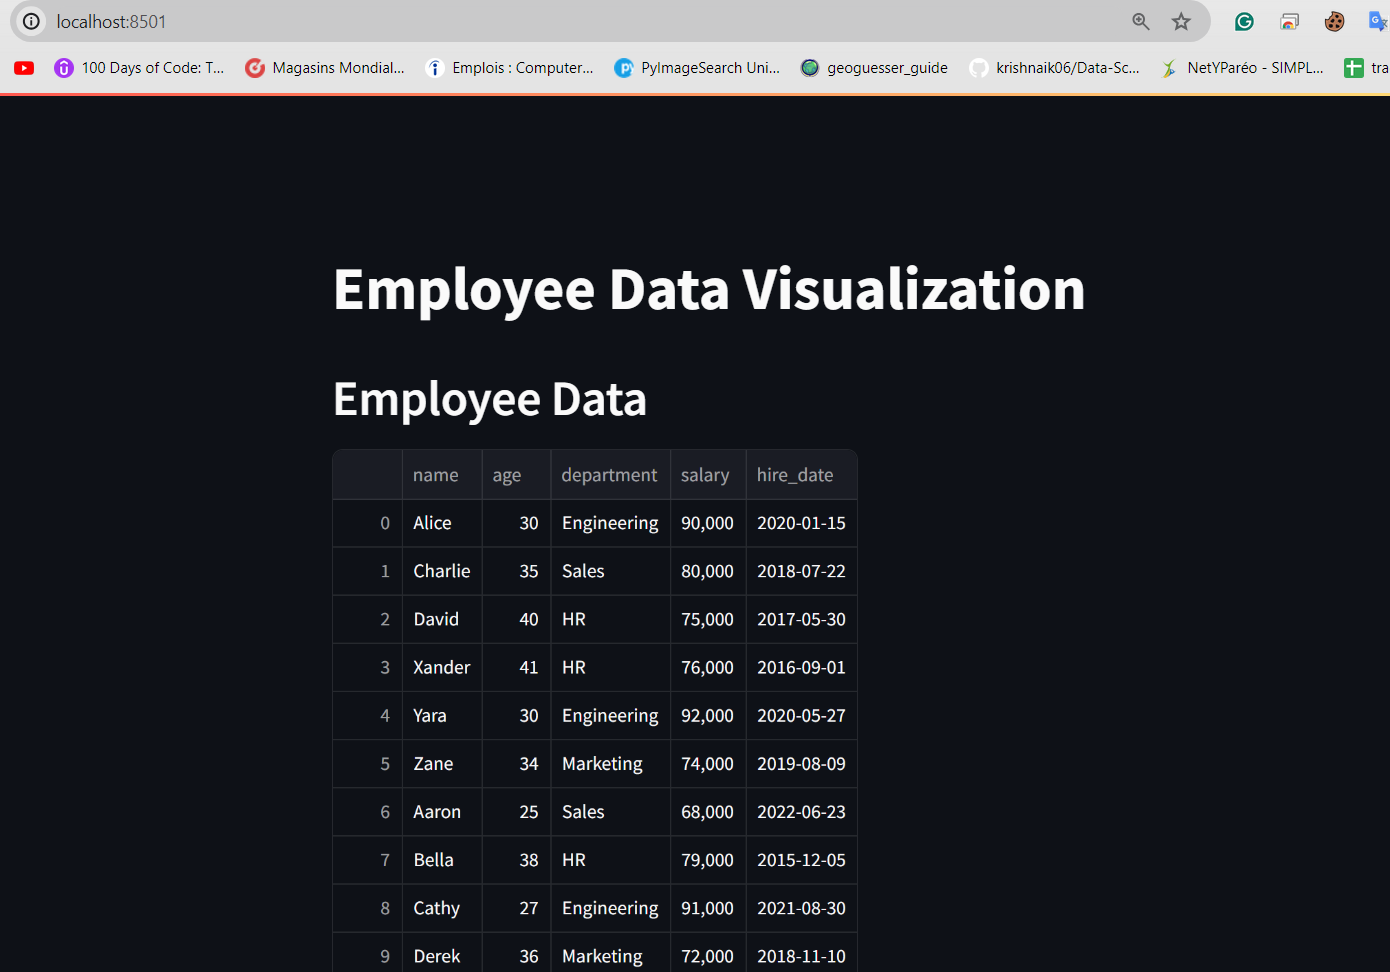
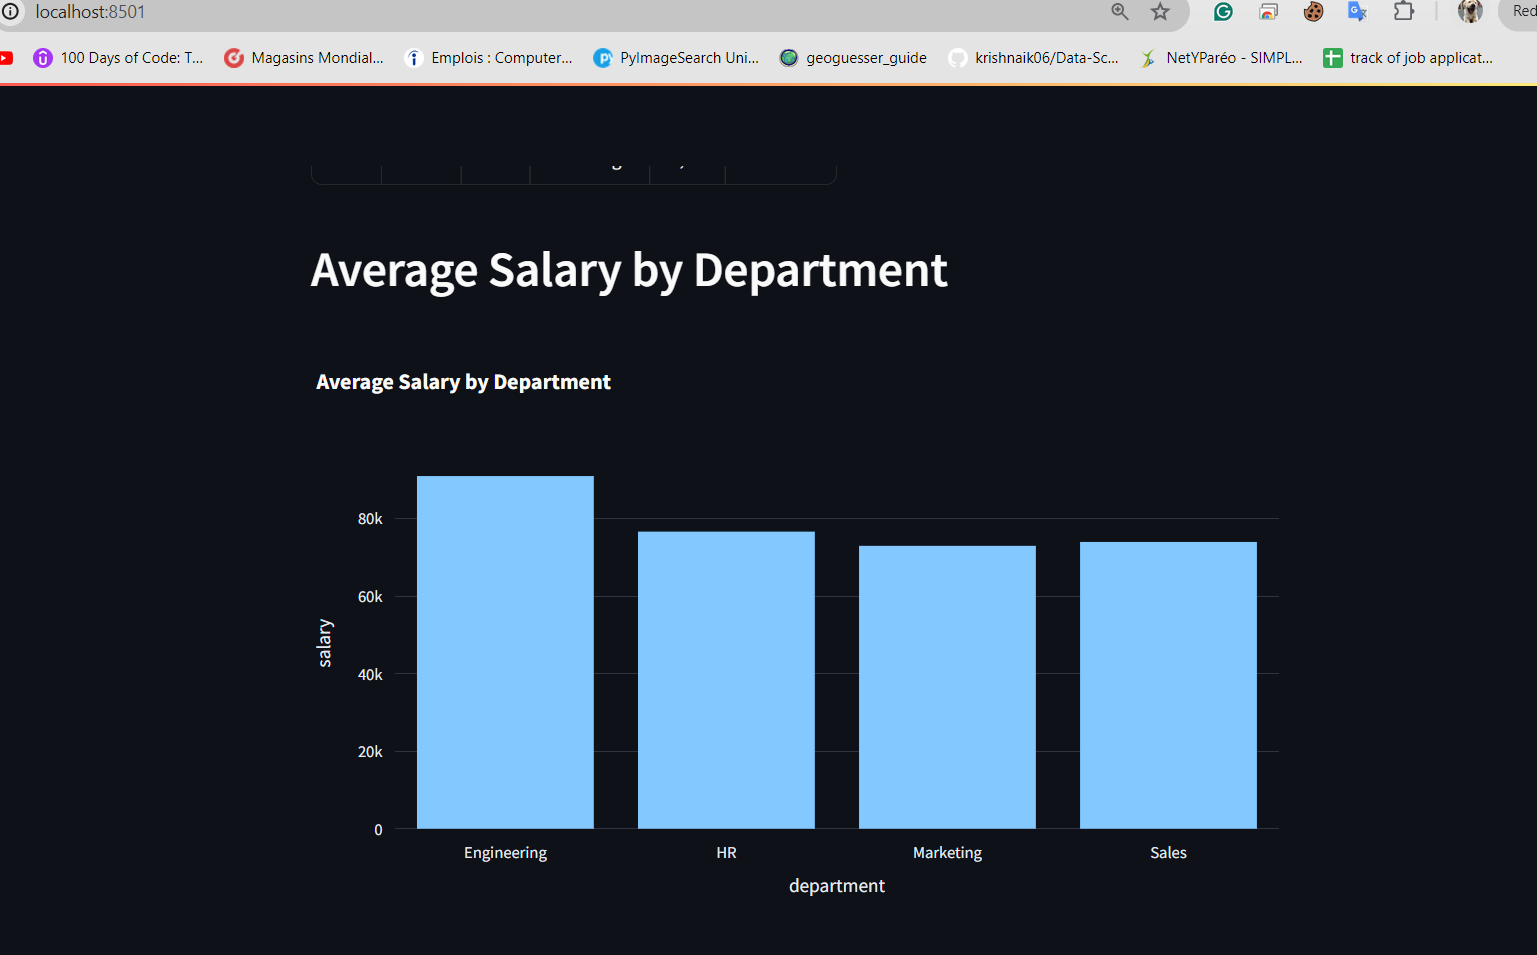
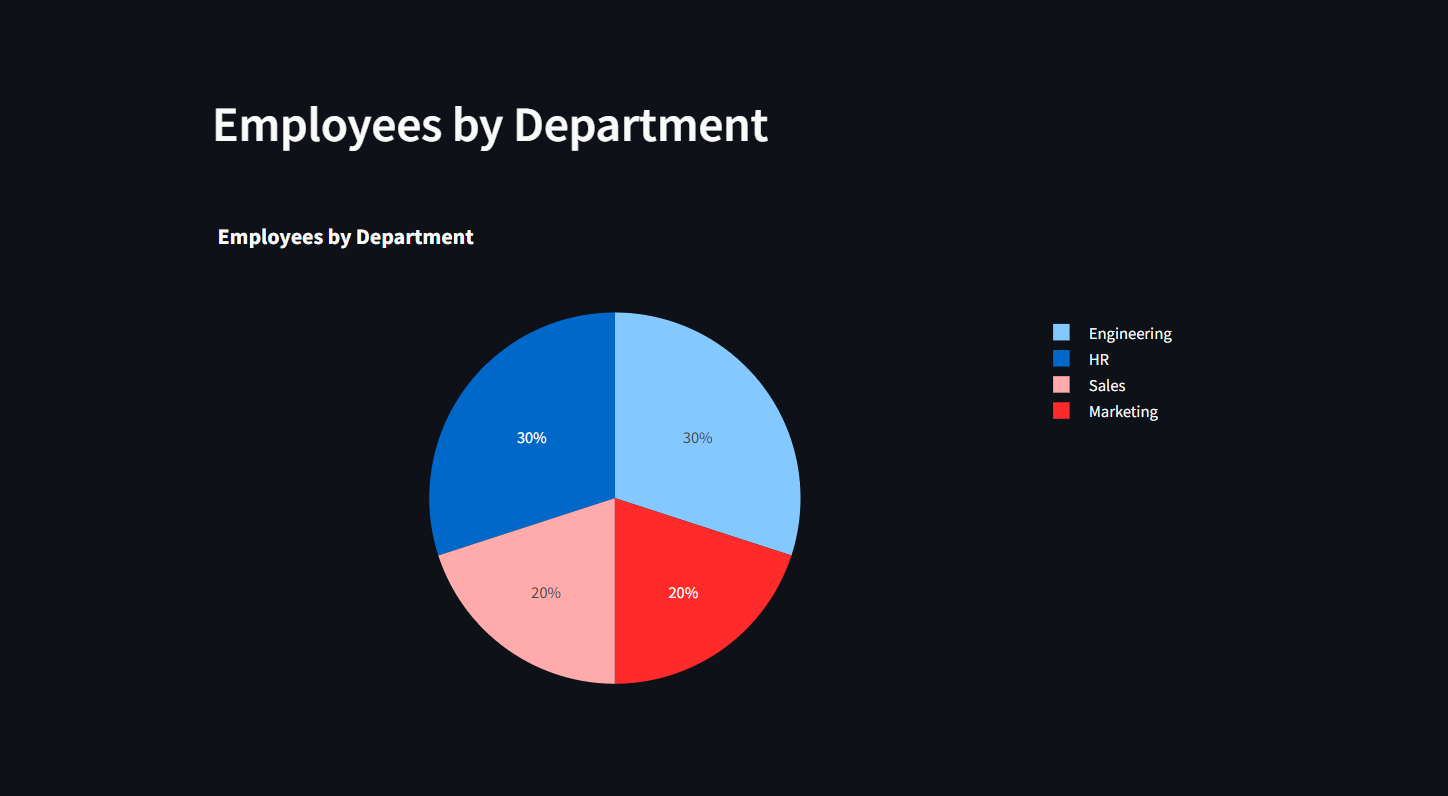
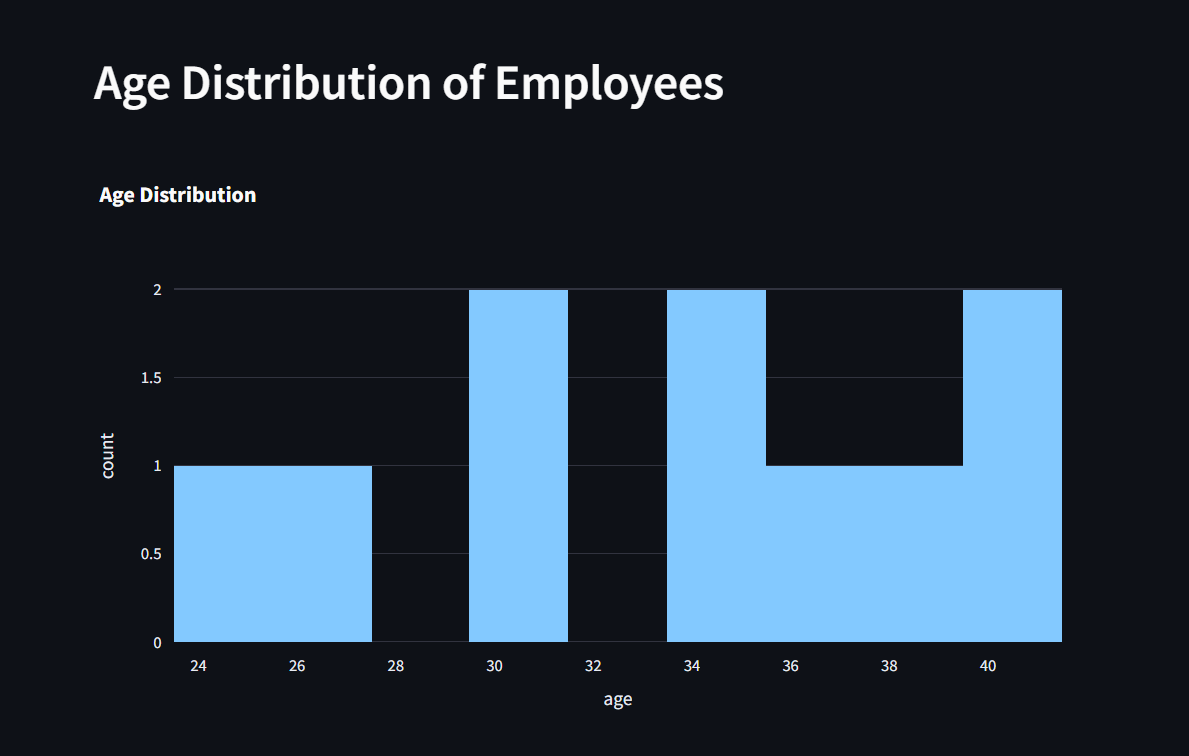

## Code to fetch data from db and vizualize it from notebook

In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 494.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 502.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 321.7 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.7 MB/s eta 0:00:0000:0100:01


In [3]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 561.1 kB/s eta 0:00:00a 0:00:01


                        _id     name  age   department  salary   hire_date
0  66ab8fd837543d7d2a2d8f09    Alice   30  Engineering   90000  2020-01-15
1  66ab908c37543d7d2a2d8f0a  Charlie   35        Sales   80000  2018-07-22
2  66ab90c637543d7d2a2d8f0b    David   40           HR   75000  2017-05-30
3  66ab910537543d7d2a2d8f0c   Xander   41           HR   76000  2016-09-01
4  66ab911637543d7d2a2d8f0d     Yara   30  Engineering   92000  2020-05-27


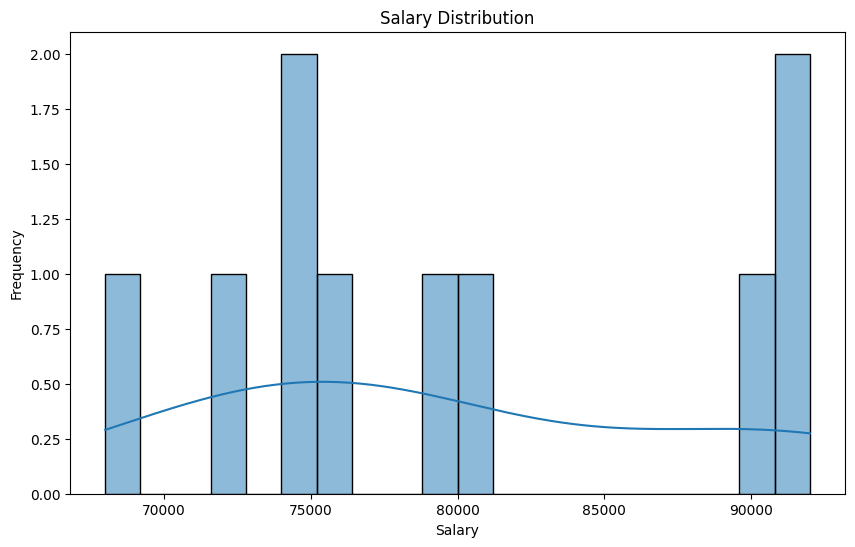

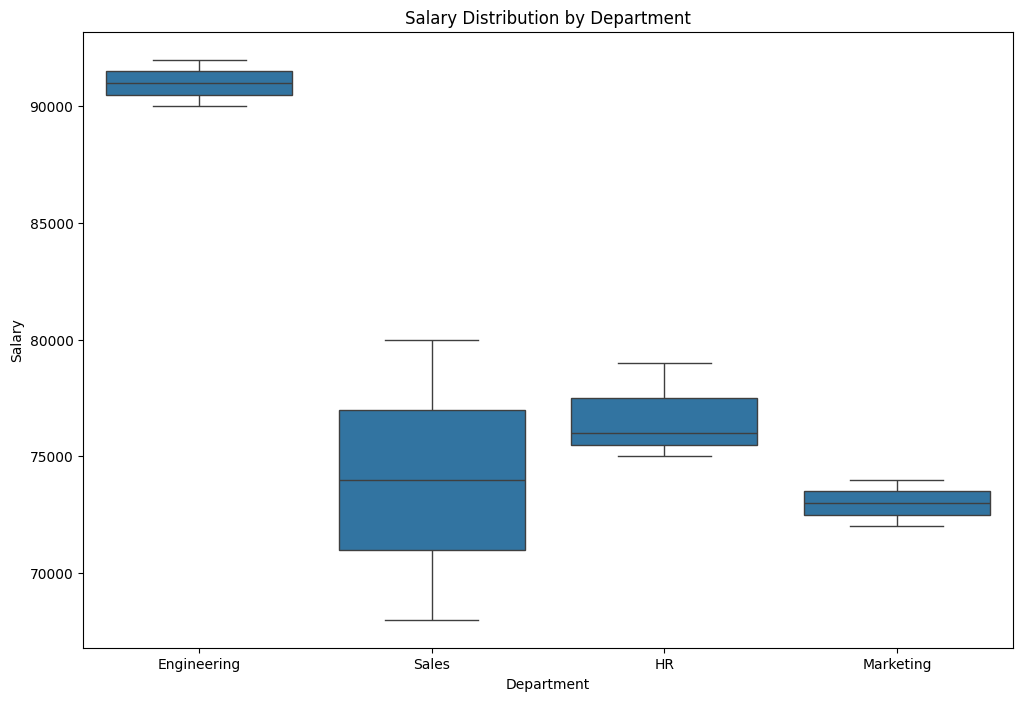

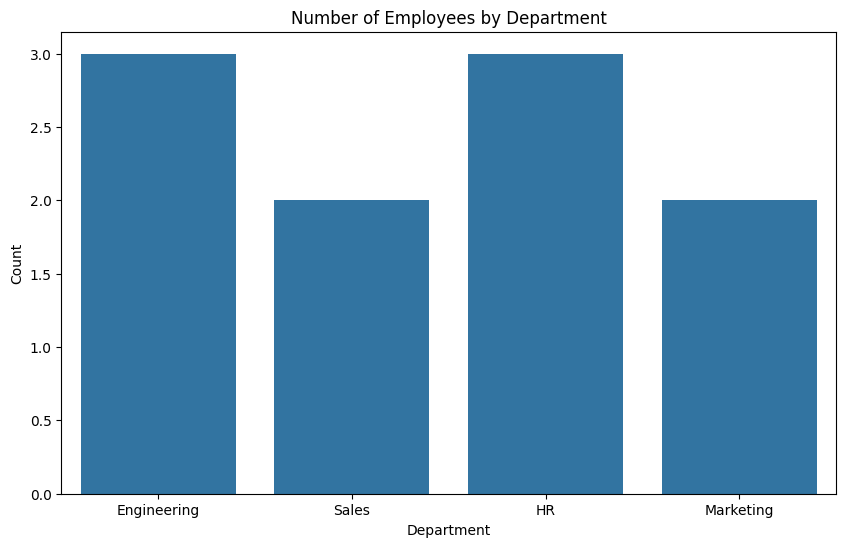

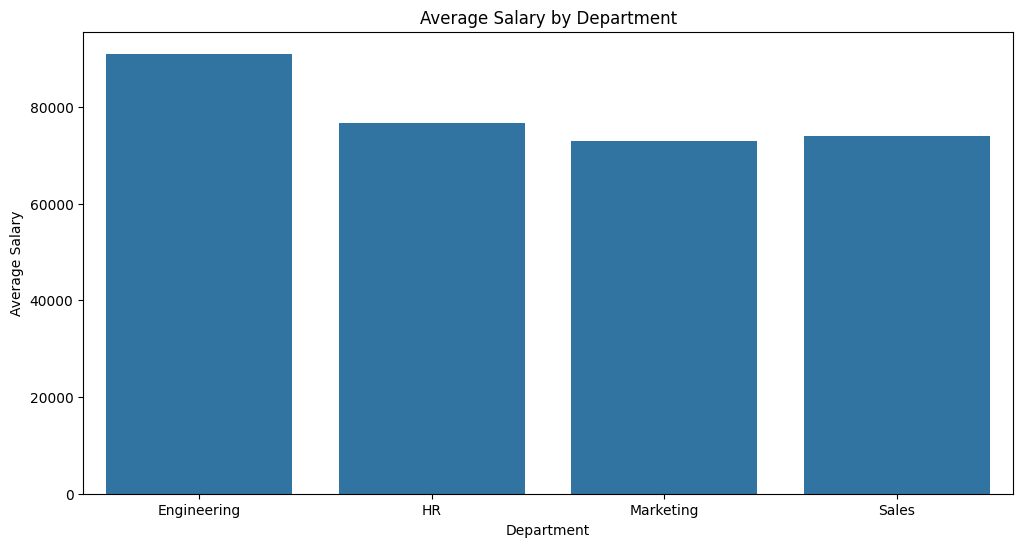

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient

# MongoDB client setup
client = MongoClient('mongodb://mongodb:27017/')
db = client['saple_data_viz']
collection = db['Salary_data']

# Fetch data from MongoDB collection
data = list(collection.find())

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

# Remove the MongoDB object ID column if it exists
if '_id' in df.columns:
    df = df.drop(columns=['_id'])

# Visualize the data
# 1. Distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# 2. Boxplot of salaries by department
plt.figure(figsize=(12, 8))
sns.boxplot(x='department', y='salary', data=df)
plt.title('Salary Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.show()

# 3. Count of employees by department
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=df)
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# 4. Average salary by department
avg_salary_by_dept = df.groupby('department')['salary'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='salary', data=avg_salary_by_dept)
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()
